In [379]:
import pandas as pd
import numpy as np
from statsmodels.discrete.discrete_model import Logit
from statsmodels.stats.multitest import multipletests
from matplotlib.pyplot import plot
from matplotlib import pyplot

In [2]:
genotype = pd.read_csv('genotype.csv')

In [83]:
phenotype = pd.read_csv('phenotype.csv')

In [306]:
pvalues = np.asarray(pvals)
pvalues = pvalues[np.logical_not(np.isnan(pvalues))

In [375]:
def py1x(x,b1):
    return(1/(1 + np.exp(-(b0 + b1 * x))))

In [343]:
b0 = result.params[0]
b1 = result.params[1]

In [338]:
y = phenotype.iloc[:,1].values
intercept = np.repeat(int(1),len(y))
z = zip(intercept,g_subset.iloc[:,1].values)
design_matrix = np.array(list(z))

In [359]:
def loss(b1):
    loss = 0
    for i in range(279):
        loss += - np.log(np.power(py1x(design_matrix[i][1],b1),y[i])*np.power(1-py1x(design_matrix[i][1],b1),y[i]))
    return(loss)

In [377]:
vals = np.arange(-1,1.5,0.01)
losses = []
for i in vals:
    losses.append(loss(b1 + i))

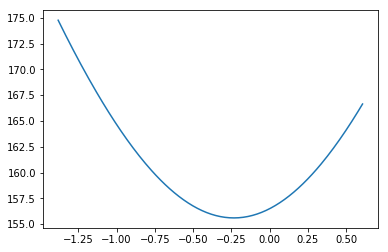

In [381]:
x = []
for i in vals:
    x.append(b1+i)
plot(x,losses)
pyplot.savefig('plot.png')

In [374]:
print(loss(b1))
min(losses)

163.72921681865353


155.45514681483294

In [335]:
z = zip(intercept,g_subset.iloc[:,9].values)
design_matrix = np.array(list(z))
model = Logit(y,design_matrix)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.670022
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  279
Model:                          Logit   Df Residuals:                      277
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Feb 2019   Pseudo R-squ.:                0.003136
Time:                        16:40:41   Log-Likelihood:                -186.94
converged:                       True   LL-Null:                       -187.52
                                        LLR p-value:                    0.2781
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3076      0.676      0.455      0.649      -1.017       1.633
x1            -0.3822      0.352     -1.085      0.278      -1.073       0.308
==============================================================================
"""

In [296]:
np.argwhere(np.isnan(pvals))

array([[ 518],
       [8270]], dtype=int64)

In [395]:
## exercise 6 - MAF
genotypes = pd.read_csv('genotype.csv', sep=',', index_col = 0)
genotypes = genotypes.iloc[:, :]
AF = genotypes.apply(lambda x: np.sum(x) / len(x) / 2, axis=0)
MAF = AF.apply(lambda x: np.min([x, 1-x]))

print(np.sum(MAF > 0.03))
print(np.sum(MAF > 0.05))
print(np.sum(MAF > 0.1))

8478
7835
6539


In [413]:
genotypes.columns[0]

'rs1695824'

In [409]:
genotypes = pd.read_csv('genotype.csv', sep=',', index_col = 0)
genotypes = genotypes.iloc[:, :]
allele_freq = []
snp03 = 0
snp05 = 0
snp1 = 0
for i in range(genotypes.shape[1]):
    freq = np.sum(genotypes.iloc[:,i])/len(genotypes.iloc[:,i])/2
    maf = np.min([freq,1- freq])
    allele_freq.append(maf)
    if maf > 0.03:
        snp03 += 1
    if maf > 0.05:
        snp05 += 1
    if maf > 0.1:
        snp1 +=1
print(snp03,snp05,snp1)

8478 7835 6539


In [392]:
genotype.head()

,sample_id,rs1695824,rs13328662,rs4654497,rs10915489,rs12132314,rs12042555,rs583027,rs241261,rs11809744,...,rs2452131,rs5970391,rs6526138,rs743637,rs2071252,rs949705,rs5925336,rs2734643,rs1050828,rs895744
0,1,2,1,0,1,2,1,2,1,2,...,2,1,2,2,2,1,1,0,2,2
1,2,1,1,0,1,2,2,2,0,0,...,2,2,0,2,0,2,0,0,2,0
2,3,2,1,1,2,2,2,2,0,0,...,1,0,2,2,0,2,0,1,2,1
3,4,2,1,1,2,2,1,2,0,0,...,0,0,2,2,2,2,0,0,2,0
4,5,0,0,0,2,2,2,2,1,0,...,0,0,2,2,2,0,2,0,2,2


In [248]:
pvals = []
for i in range(len(snp05)):
	z = zip(intercept,g_subset.iloc[:,i].values)
	design_matrix = np.array(list(z))
	model = Logit(y,design_matrix)
	result = model.fit()
	pvals.append(result.pvalues[1])

Optimization terminated successfully.
         Current function value: 0.654096
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.670611
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.671181
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.670134
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.669977
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.671244
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.660241
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667664
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.656553
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.670022
  

c:\program files\python\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\program files\python\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Gaurav\AppData\Roaming\Python\Python36\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Gaurav\AppData\Roaming\Python\Python36\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Gaurav\AppData\Roaming\Python\Python36\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Optimization terminated successfully.
         Current function value: 0.671046
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.664170
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672066
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.667518
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.672008
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.671719
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.672127
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.668835
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.669337
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.666318
  